# CHAL-04 :: data science challenge

---

## Information

In this challenge, suppose we are looking to do social network analysis for prospective customers. We want to extract from their social network a metric called "closeness centrality".


Centrality metrics try to approximate a measure of influence of an individual within a social network. The distance between any two vertices is their shortest path. The *farness* of a given vertex *v* is the sum of all distances from each vertex to *v*. Finally, the *closeness* of a vertex *v* is the inverse of the *farness*.
 

The first part of the challenge is to rank the vertices in a given graph by their *closeness*. The graph is provided in the attached file; each line of the file consists of two vertex names separated by a single space, representing an edge between those two nodes.


The second part of the challenge is to create a RESTful web server with endpoints to register edges and display the centrality of the graph.


You should deliver a git repository with your code and a short README file outlining the solution and explaining how to build and run the code. You should deliver your code in a functional programming language — Clojure, Haskell, ML, F# and Scala are acceptable — and we'll analyse the structure and readability of the code-base. We expect production-grade code. There is no problem in using libraries, for instance for testing or network interaction, but please avoid using a library that already implements the core graph or social network algorithms.

 
Don't shy away from asking questions whenever you encounter a problem. Also, please do get in touch at any moment if you believe the timeframe is unrealistic.

### Social Network Analysis :: some constraints

**1 -** A eliminação do processo ocorre caso não atingir o resultado esperado para a lógica do desafio;

**2 -** Após finalizar o código retorno o contato para seguirmos o processo, a velocidade de implementação é mais importante que a linguagem;

**3 -** Caso não conheça RESTful, pode focar apenas no algoritmo;

**4 -** Apesar dos requisitos de desenvolvimento com linguagem funcional scala, pode ser desenvolvido usando R, Python ou Java também;


### References

- Closeness Centrality: http://en.wikipedia.org/wiki/Centrality#Closeness_centrality

- Shortest path: http://en.wikipedia.org/wiki/Shortest_path_problem

-------------------------------------------------------------------------------

## Implementation

### Libraries 

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as ntx
from collections import Counter

### Data

In [161]:
data = pd.read_csv("edges.dat", delimiter=' ', names=['pageA','pageB'])

### Create the Graph

In [162]:
nodes = Counter(data['pageA']).keys()
edges = [(i,j) for i,j in zip(data['pageA'],data['pageB'])]

G = ntx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

### Function to compute the *Closeness*

In [163]:
def comp_closeness(G,nodes):
    clns = pd.DataFrame(columns=['nodes','closeness'])
    clns['nodes'] = nodes

    closeness = []
    for n in nodes:
        spl = ntx.shortest_path_length(G,source=n).values()
        sum_spl = np.sum(spl)
        spl_mean = np.mean(spl)
        closeness.append(1/float(spl_mean))

    clns['closeness'] = closeness
    clns = clns.sort_values(by='closeness', ascending=0)
    return clns

### Compute *Closeness Centrality* for all nodes

In [166]:
clns = comp_closeness(G,G.nodes())

clns

,nodes,closeness
44,44,0.598802
88,88,0.591716
33,33,0.588235
74,74,0.584795
20,20,0.581395
51,51,0.581395
5,5,0.578035
76,76,0.574713
89,89,0.574713
28,28,0.571429


### Plot the data 

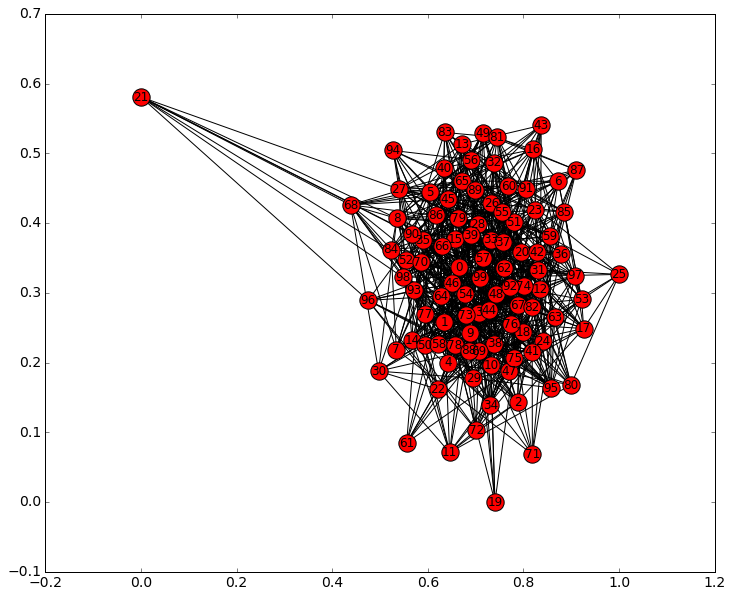

In [168]:
ntx.draw_networkx(G)

------------------------------------------------------------

## RESTful Server APP: Testing

You must run the RESTfull server to proceed in this section.
The name of file you need to run is *Netserver.py*.

Please, verify you have already installed the following python packages before taking next steps:

- flask
- json
- numpy
- operator
- matplotlib
- collections
- requests
- networkx
- Jupyter notebook (http://anaconda.org/)

If not, you may install them by using pip:

- $ pip install < package >

---------------------------------------------------------

### How to run the server on Linux?:

**1)** Open the terminal.

**2)** Go to the folder of the server.

**3)** Type: **$ python Netserver.py**

You may access the server by typing **http://127.0.0.1:5000** in a browser, using the command **curl** on terminal, or using python with the package *request*.

### Information

**[IMPORTANT-1]** **This section uses python with the package *request* to interage with the RESTful server.**

**[IMPORTANT-2]** I advice you to not run all cells in this section, because they different actions you may take such as add all Edges, or a set of Edges, delete a Edge, Node etc. Therefore, you must not run all cells.

**[IMPORTANT-3]** The challenge asked to implement an edge section to add edges. However, I also implemented a section to deal with nodes.

**[IMPORTANT-4]** All experiments were performed on Linux Ubuntu 14.04.

### Libraries for this section

In [169]:
from requests import get, put, delete
import json

### Verify if the input is a number

In [170]:
def verifyNumber(s):
    try:
        float(s)
        #int(s)
        return True
    except ValueError:
        return False

## 1 - Nodes

## Add Nodes

### Add all Nodes

We set the *closeness* of all Nodes to zero.

In [135]:
nds = Counter(data['pageA']).keys()
for n in nds:
    put('http://localhost:5000/node/add/{}'.format(n), data={'data': 0}).json()

### Add one node

In [147]:
onode = 44
res = put('http://localhost:5000/node/add/{}'.format(onode), data={'data': 0}).json()
res = json.loads(res)
print("Response: {}\n".format(res["resp"]))

Response: Node added successfuly!



## List nodes

You also may access this link to check out the inserted nodes:
http://localhost:5000/nodes/

### All Nodes

In [152]:
res = get('http://localhost:5000/nodes/').json()
if len(res) != 0:
    print("Node","Closeness")
    for k,v in zip(res.keys(), res.values()):
        print(int(k),float(v))
else:
    print("There are not nodes!")

('Node', 'Closeness')
(54, 0.0)
(51, 0.0)
(98, 0.0)
(50, 0.0)
(60, 0.0)
(61, 0.0)
(62, 0.0)
(89, 0.0)
(53, 0.0)
(66, 0.0)
(67, 0.0)
(69, 0.0)
(80, 0.0)
(81, 0.0)
(86, 0.0)
(85, 0.0)
(24, 0.0)
(26, 0.0)
(27, 0.0)
(20, 0.0)
(22, 0.0)
(46, 0.0)
(47, 0.0)
(44, 0.0)
(42, 0.0)
(29, 0.0)
(40, 0.0)
(41, 0.0)
(1, 0.0)
(0, 0.0)
(3, 0.0)
(5, 0.0)
(4, 0.0)
(6, 0.0)
(9, 0.0)
(8, 0.0)
(96, 0.0)
(83, 0.0)
(76, 0.0)
(38, 0.0)
(73, 0.0)
(59, 0.0)
(92, 0.0)
(95, 0.0)
(97, 0.0)
(58, 0.0)
(11, 0.0)
(10, 0.0)
(12, 0.0)
(15, 0.0)
(14, 0.0)
(55, 0.0)
(19, 0.0)
(18, 0.0)
(57, 0.0)
(30, 0.0)
(37, 0.0)
(36, 0.0)
(35, 0.0)
(34, 0.0)
(33, 0.0)
(74, 0.0)
(88, 0.0)
(48, 0.0)
(90, 0.0)


### Specific node

In [77]:
node = 44
res = get('http://localhost:5000/node/{}'.format(node)).json()
res = json.loads(res)
if verifyNumber(res['node']): #isinstance(res['node'], int):
    print("Node {} ---> Centrality = {}".format(node, res['node']))
else:
    print("Response: {}".format(res['node']))

Response: This node does not exist!


## Delete Nodes

### Delete a Node 

In [156]:
node = 3
res = delete('http://localhost:5000/node/del/{}'.format(node)).json()
res = json.loads(res)
print("Response: {}".format(res["resp"]))

Response: Node deleted successfuly!


### Delete all Nodes

In [145]:
res = delete('http://localhost:5000/nodes/delall', data={'data': 'all'}).json()
res = json.loads(res)
print("Response: {}".format(res['resp']))

Response: All nodes were deleted!


## 2 - Edges

## Add Edges

### Add a set of Edges

Define the nodes to create a set of instances

In [149]:
eset = [42,88,3,0]

In [150]:
frames = []
for s in eset:
    e = data.loc[data['pageA'] == s]
    e2 = data.loc[data['pageB'] == s]
    frames.append(e)
    frames.append(e2)

    set_edges = pd.concat(frames)

for a, b in zip(set_edges.pageA, set_edges.pageB):
    put('http://localhost:5000/edge/add/', data={'vert1': a, 'vert2': b}).json()

### Add all Edges

In [53]:
for a,b in zip(data['pageA'],data['pageB']):
    put('http://localhost:5000/edge/add/', data={'vert1': a, 'vert2': b}).json()

### Add edges

In [59]:
vert1 = 44
vert2 = 1
res = put('http://localhost:5000/edge/add/', data={'vert1': vert1, 'vert2': vert2}).json()
res = json.loads(res)
print("Response: {}\n".format(res['resp']))

Response: Edge added successfuly!



## List Edges

### All Edges

In [157]:
get('http://localhost:5000/edges/').json()

[[42, 36],
 [42, 24],
 [42, 86],
 [42, 62],
 [42, 38],
 [42, 33],
 [42, 27],
 [42, 81],
 [42, 58],
 [74, 42],
 [47, 42],
 [67, 42],
 [80, 42],
 [48, 42],
 [53, 42],
 [97, 42],
 [10, 42],
 [35, 42],
 [88, 66],
 [88, 60],
 [88, 22],
 [88, 57],
 [88, 24],
 [88, 20],
 [88, 46],
 [88, 1],
 [88, 18],
 [88, 30],
 [88, 69],
 [88, 40],
 [88, 61],
 [88, 11],
 [80, 88],
 [41, 88],
 [10, 88],
 [4, 88],
 [15, 88],
 [50, 88],
 [34, 88],
 [37, 88],
 [54, 88],
 [47, 88],
 [98, 88],
 [59, 88],
 [22, 88],
 [89, 88],
 [40, 88],
 [73, 88],
 [0, 29],
 [0, 69],
 [0, 38],
 [0, 5],
 [0, 15],
 [0, 8],
 [0, 47],
 [0, 26],
 [67, 0],
 [18, 0],
 [96, 0],
 [51, 0],
 [37, 0],
 [85, 0],
 [62, 0]]

## Delete Edges

### Delete an Edge

In [154]:
vert1 = 33
vert2 = 0
res = delete('http://localhost:5000/edge/del/', data={'vert1':vert1, 'vert2':vert2}).json()
res = json.loads(res)
print("Response: {}".format(res["resp"]))

Response: Edge deleted successfuly!


### Delete All Edges

In [55]:
res = delete('http://localhost:5000/edges/delall').json()
res = json.loads(res)
print("Response: {}".format(res["resp"]))

Response: All edges were deleted!


## Compute closeness

After run the cell below, you may access this link to also check out the closeness values:
http://localhost:5000/closeness

In [158]:
res = get('http://localhost:5000/closeness').json()
if type(res) is unicode:
    res = json.loads(res)

    if res["resp"] == "more":
        print("You need more Nodes/Edges to compute closeness!\n")

else:
    if len(res) != 0:
        print("node", "closeness")
        for r in res:
            print(r[0], r[1])
        print("")
    else:
        print("There are not nodes!\n")

('node', 'closeness')
(5, 0.304093567251462)
(8, 0.304093567251462)
(26, 0.304093567251462)
(29, 0.304093567251462)
(51, 0.304093567251462)
(85, 0.304093567251462)
(96, 0.304093567251462)
(27, 0.3151515151515152)
(33, 0.3151515151515152)
(35, 0.3151515151515152)
(36, 0.3151515151515152)
(48, 0.3151515151515152)
(53, 0.3151515151515152)
(58, 0.3151515151515152)
(74, 0.3151515151515152)
(81, 0.3151515151515152)
(86, 0.3151515151515152)
(97, 0.3151515151515152)
(1, 0.3586206896551724)
(4, 0.3586206896551724)
(11, 0.3586206896551724)
(20, 0.3586206896551724)
(22, 0.3586206896551724)
(30, 0.3586206896551724)
(34, 0.3586206896551724)
(40, 0.3586206896551724)
(41, 0.3586206896551724)
(46, 0.3586206896551724)
(50, 0.3586206896551724)
(54, 0.3586206896551724)
(57, 0.3586206896551724)
(59, 0.3586206896551724)
(60, 0.3586206896551724)
(61, 0.3586206896551724)
(66, 0.3586206896551724)
(73, 0.3586206896551724)
(89, 0.3586206896551724)
(98, 0.3586206896551724)
(38, 0.36879432624113473)
(62, 0.368794

## Plot the Graph

### Checkout generated Graph (RESTful) - 1st option (Browser)

http://localhost:5000/graph.html

P.S.: If the graph equals to the last one even if you performed another experiment. Please, refresh the page (F5).

### Checkout generated Graph (RESTful) - 2nd option (Jupyter)

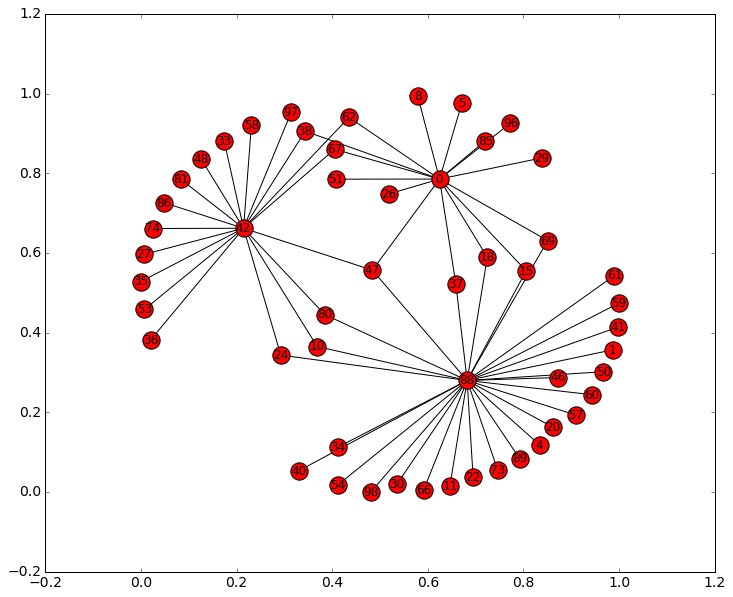

In [160]:
gtedges = get('http://localhost:5000/edges/').json()

GH = ntx.Graph()
GH.add_edges_from(gtedges)
ntx.draw_networkx(GH)